In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from model import MyModel
from keras.preprocessing.image import ImageDataGenerator
from mixup_generator import MixupGenerator
from random_eraser import get_random_eraser

Using TensorFlow backend.


In [2]:
my_model = MyModel()
(x_train, y_train), (x_test, y_test), num_classes = my_model.load_data(
            my_model.target_data)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
generator1 = MixupGenerator(x_train, y_train, alpha=1.0)()

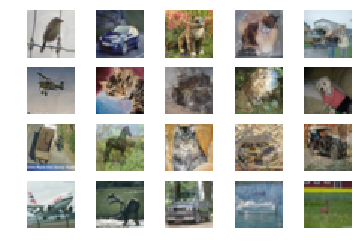

In [3]:
x, y = next(generator1)
cols, rows = 5, 4
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x[i].astype(np.uint8), interpolation="nearest")
    plt.axis('off')

In [4]:
datagen2 = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

generator2 = MixupGenerator(x_train, y_train, alpha=1.0, datagen=datagen2)()

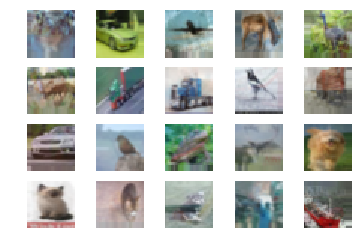

In [5]:
x, y = next(generator2)
cols, rows = 5, 4
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x[i].astype(np.uint8), interpolation="nearest")
    plt.axis('off')


In [6]:
datagen3 = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    preprocessing_function=get_random_eraser(v_l=0, v_h=255))

generator3 = MixupGenerator(x_train, y_train, alpha=1.0, datagen=datagen3)()

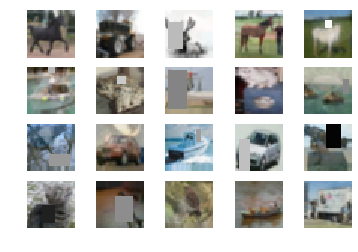

In [7]:
x, y = next(generator3)
cols, rows = 5, 4
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x[i].astype(np.uint8), interpolation="nearest")
    plt.axis('off')